In [158]:
import numpy as np
import matplotlib.pyplot as plt
from hand_to_mouth import *
from copy import deepcopy

%load_ext autoreload
%autoreload 2

# %pip install EconModel
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()
model_new = deepcopy(model)    # Copy for no reference dependence later

from estimation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model with reference dependence

In [159]:
est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'type_shares1'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 0.1]  # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,1000.0), (0.0,1000.0), (0.0,1.0)] # Bounds for the parameters

est = method_simulated_moments(model, est_par,theta0,bounds)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')


Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.036
sigma                     1.981
cost1                   111.064
cost2                   391.251
type_shares1              0.042
Objective:               0.1121
Number of iterations:    32


In [160]:
print(model.par.type_shares1)
print(model.par.type_shares2)
print(model.par.type_shares3)

0.04204805977529851
0.9579519402247015
0.0


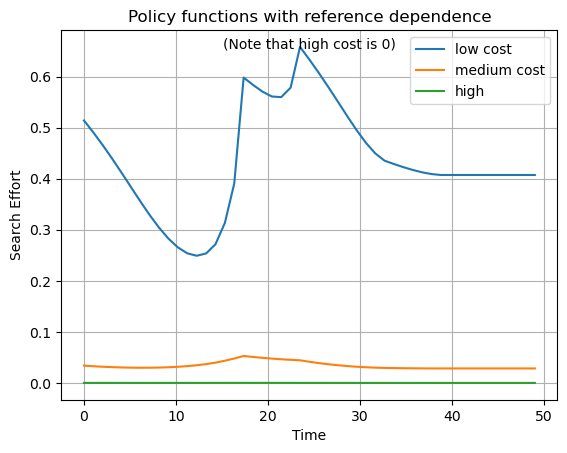

In [161]:
search_effort = solve_search_effort(model.par)
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, search_effort[0,:], label = 'low cost') 
plt.plot(time, search_effort[1,:], label = 'medium cost') 
plt.plot(time, search_effort[2,:], label = 'high' ) 
plt.text(0.5, 0.96, '(Note that high cost is 0)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel('Time')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Policy functions with reference dependence')
plt.grid(True)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


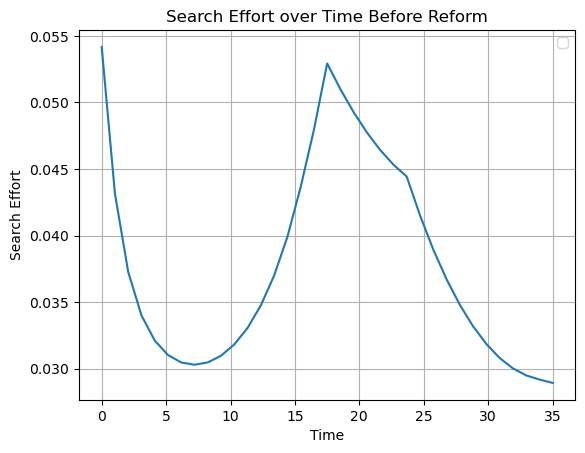

In [162]:
sim = sim_search_effort(model.par)
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, sim, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time Before Reform')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


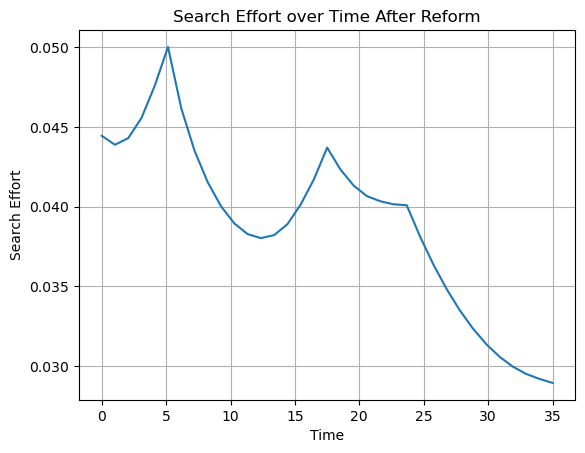

In [163]:
model.par.b1 = 342.0/675.0      # Value after reform
model.par.b2 = 171.0/675.0      # Value after reform

model.allocate()
s_forecast = model.solve()

# Now plotting s_forecast
time = np.linspace(0, model.par.T_sim, model.par.T_sim)
plt.plot(time, s_forecast, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()

### Mean Square error

In [164]:
true_data_outofsample = model.data.moments_after
true_data_insample = model.data.moments_before
# Get the mean square errors
mse_eta1_outofsample = np.mean((true_data_outofsample - s_forecast)**2)
mse_eta1_insample = np.mean((true_data_insample - sim)**2)
print(f"The mean square error from the reference dependent model out of sample is {mse_eta1_outofsample:.9f}")
print(f"The mean square error from the reference dependent model in sample is {mse_eta1_insample:.9f}")


The mean square error from the reference dependent model out of sample is 0.000096065
The mean square error from the reference dependent model in sample is 0.000153099


# Model with **NO** reference dependence

In [165]:

model_new.par.eta = 0.0     # Removes reference dependence



est_par = ['gamma', 'sigma', 'cost1', 'cost2', 'cost3', 'type_shares1', 'type_shares3'] # Parameters to estimate
theta0 = [0.9, 0.1, 100.0, 100.0, 100.0, 0.1, 0.1] # Initial guesses
bounds = [(0, 50.0), (0.0, 5.0), (0.0,500.0), (0.0,500.0), (0.0,500.0), (0,1), (0,1)] # Bounds for the parameters

est = method_simulated_moments(model_new, est_par,theta0,bounds)

print("Optimization Results:")
print("---------------------")
print(f'{"Parameter":<15} {"Estimate":<15}')
for param, estimate in zip(est_par, est.x):
    print(f'{param:<15} {estimate:>15.3f}')
print(f'Objective:               {est.fun:.4f}')
print(f'Number of iterations:    {est.nit}')

Optimization Results:
---------------------
Parameter       Estimate       
gamma                     0.051
sigma                     0.100
cost1                   113.072
cost2                   346.409
cost3                   113.072
type_shares1              0.121
type_shares3              0.121
Objective:               0.2657
Number of iterations:    38


In [166]:
print(model_new.par.type_shares1)
print(model_new.par.type_shares2)
print(model_new.par.type_shares3)

0.12072242488790176
0.7585551771481159
0.12072239796398229


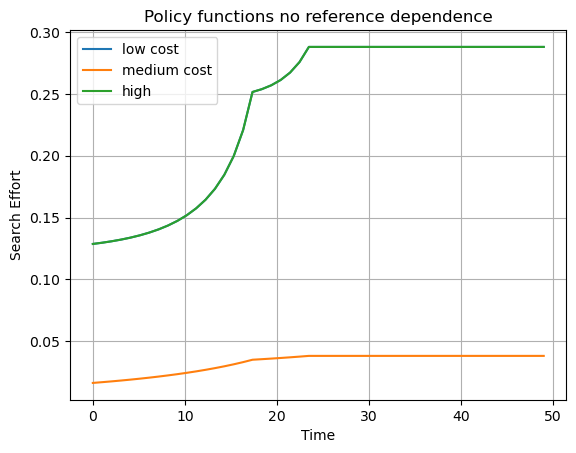

In [167]:
search_effort_new = solve_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T, model_new.par.T)
plt.plot(time, search_effort_new[0,:], label = 'low cost') 
plt.plot(time, search_effort_new[1,:], label = 'medium cost') 
plt.plot(time, search_effort_new[2,:], label = 'high' ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Policy functions no reference dependence')
plt.grid(True)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


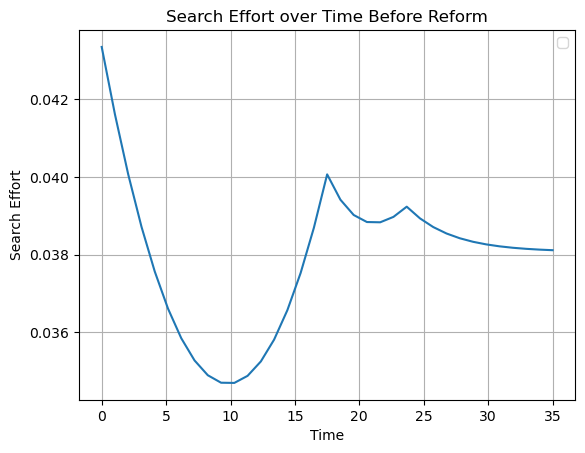

In [168]:
sim_new = sim_search_effort(model_new.par)
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, sim_new, ) 
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time Before Reform')
plt.grid(True)
#y axis limits
#plt.ylim(0.0, 0.08)
plt.legend()
plt.show()


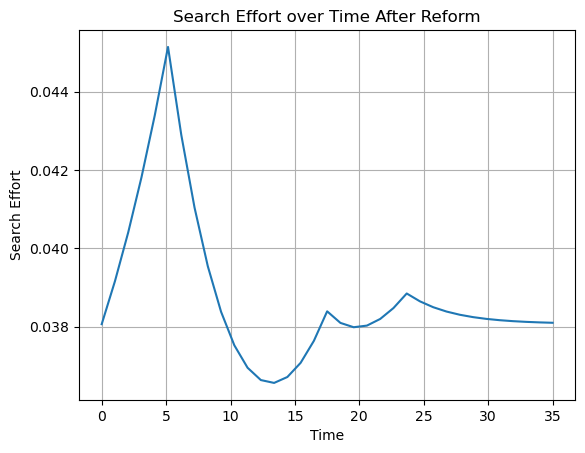

In [169]:
model_new.par.b1 = 342.0/675.0      # Value after reform
model_new.par.b2 = 171.0/675.0      # Value after reform

model_new.allocate()
s_forecast_new = model_new.solve()


# Now plotting s_forecast
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)
plt.plot(time, s_forecast_new, )
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()

### Mean Square Error

In [170]:
true_data_outofsample = model_new.data.moments_after
true_data_insample = model_new.data.moments_before

# Get the mean square errors
mse_eta0_outofsample = np.mean((true_data_outofsample - s_forecast_new)**2)
mse_eta0_insample = np.mean((true_data_insample - sim_new)**2)

# Comparison out of sample
comparison1 = "smaller" if mse_eta1_outofsample < mse_eta0_outofsample else "bigger" if mse_eta1_outofsample > mse_eta0_outofsample else "equal"
comparison2 = "WITH reference dependence" if mse_eta1_outofsample < mse_eta0_outofsample else "WITHOUT reference dependence" 

# Comparison in sample
comparison3 = "smaller" if mse_eta1_insample < mse_eta0_insample else "bigger" if mse_eta1_insample > mse_eta0_insample else "equal"
comparison4 = "WITH reference dependence" if mse_eta1_insample < mse_eta0_insample else "WITHOUT reference dependence"


print("In sample: ")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_insample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_insample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison3}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison4}\033[0m.")
print("-" * 100)



print("Out of sample:")
print("-" * 100)
print(f"The mean square error from the model \033[1mwith\033[0m reference dependence is {mse_eta1_outofsample}")
print(f"The mean square error from the model \033[1mwithout\033[0m reference dependence is {mse_eta0_outofsample}")
print(f"The mean square error for the model \033[1mwith\033[0m reference dependence is \033[1m{comparison1}\033[0m than the model without.")
print(f"Best model: \033[1m{comparison2}\033[0m.")
print("-" * 100)

In sample: 
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 0.00015309861564553832
The mean square error from the model without reference dependence is 9.886401978109169e-05
The mean square error for the model with reference dependence is bigger than the model without.
Best model: WITHOUT reference dependence.
----------------------------------------------------------------------------------------------------
Out of sample:
----------------------------------------------------------------------------------------------------
The mean square error from the model with reference dependence is 9.60650382535329e-05
The mean square error from the model without reference dependence is 6.910020154044302e-05
The mean square error for the model with reference dependence is bigger than the model without.
Best model: WITHOUT reference dependence.
------------------------------------

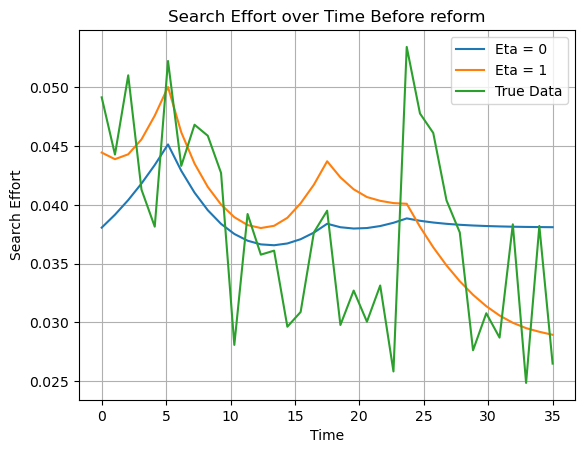

In [171]:
time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot(time, s_forecast_new, label='Eta = 0')                     # Model with no reference dependence
plt.plot(time, s_forecast, label='Eta = 1')                         # Model with reference dependence
plt.plot(time, true_data, label='True Data')                        # True data
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time Before reform')
plt.grid(True)
plt.show()

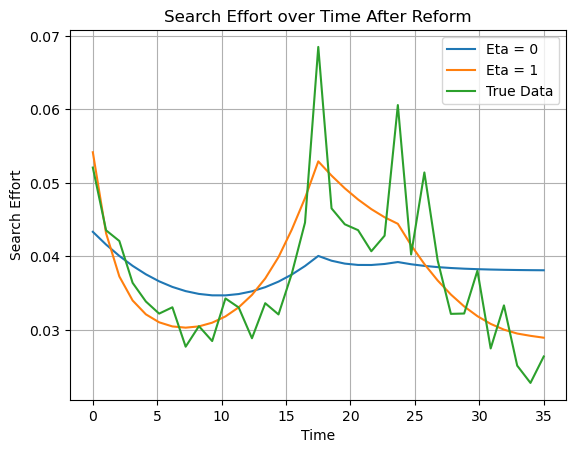

In [172]:
before = model_new.data.moments_before

time = np.linspace(0, model_new.par.T_sim, model_new.par.T_sim)     # x-axis
plt.plot(time, sim_new, label='Eta = 0')                            # Model with no reference dependence
plt.plot(time, sim, label='Eta = 1')                                # Model with reference dependence
plt.plot(time, before, label='True Data')                           # True data
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.legend()
plt.title('Search Effort over Time After Reform')
plt.grid(True)
plt.show()